In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from spcqe.quantiles import SmoothPeriodicQuantiles

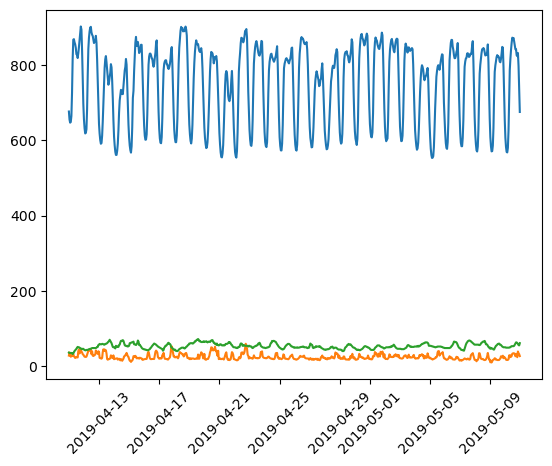

In [3]:
ix = 100
data_view = df.iloc[24 * ix:24 * (ix + 30)]
plt.plot(data_view)
plt.xticks(rotation=45);

In [25]:
P1 = int(365*24)
P2 = int(7*24)
P3 = int(24)
K = 3
l = 0.1
spq = SmoothPeriodicQuantiles(K, [P1, P2, P3], quantiles=.5, weight=l, verbose=True, solver='ECOS')
spq

SmoothPeriodicQuantiles(num_harmonics=3, periods=[8760, 168, 24],
                        quantiles=array([0.5]), solver='ECOS', verbose=True,
                        weight=0.1)

In [33]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# y1 = sc.fit_transform(df['RT_Demand'].to_numpy().reshape(-1, 1))
# y1 = y1.ravel()
y1 = df['RT_Demand'].to_numpy()
spq.fit(y1)
print(f"total time: {spq.fit_time:.2f} seconds")

                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Aug 25 01:05:01 PM: Your problem has 128 variables, 0 constraints, and 0 parameters.
(CVXPY) Aug 25 01:05:01 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Aug 25 01:05:01 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Aug 25 01:05:01 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Aug 25 01:05:01 PM: Compiling problem (target solver=ECOS).
(CVXPY) Aug 25 01:05:01 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -

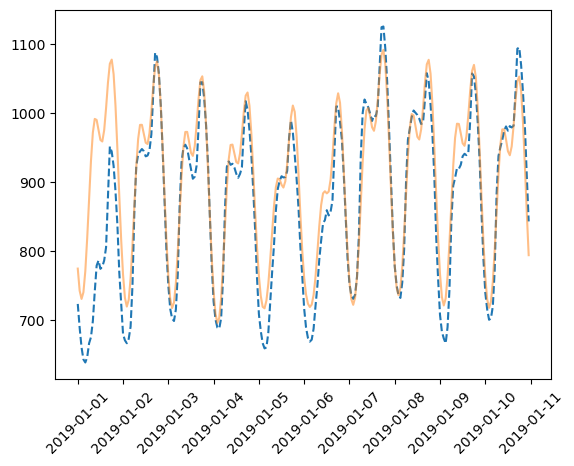

In [27]:
ix = 0
slc = np.s_[24 * ix:24 * (ix + 10)]
xs = df.index[slc]
plt.plot(xs, sc.inverse_transform(y1[slc].reshape(-1,1)).ravel(), ls='--')
plt.plot(xs, sc.inverse_transform(spq.fit_quantiles[slc, :].reshape(-1,1)).ravel(), alpha=0.5)
plt.xticks(rotation=45);

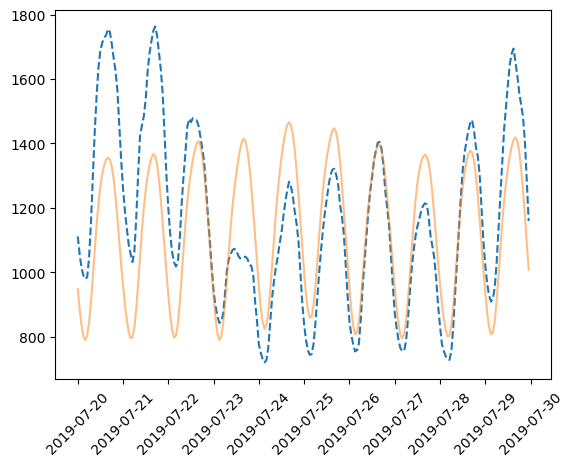

In [28]:
ix = 200
slc = np.s_[24 * ix:24 * (ix + 10)]
xs = df.index[slc]
plt.plot(xs, sc.inverse_transform(y1[slc].reshape(-1,1)).ravel(), ls='--')
plt.plot(xs, sc.inverse_transform(spq.fit_quantiles[slc, :].reshape(-1,1)).ravel(), alpha=0.5)
plt.xticks(rotation=45);

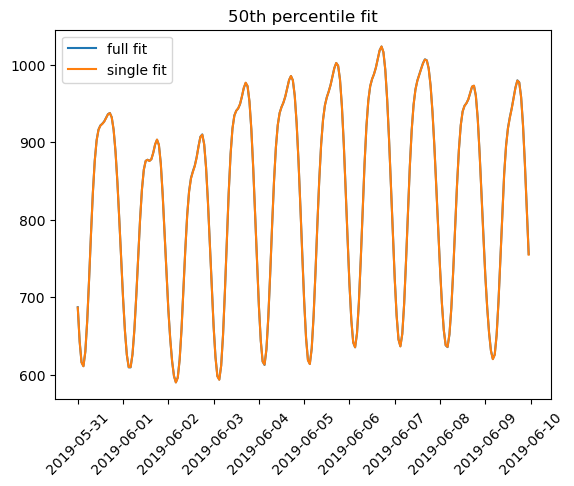

In [29]:
ix = 150
slc = np.s_[24 * ix:24 * (ix + 10)]
xs = df.index[slc]
saved_quantiles = np.loadtxt('quantiles_saved.txt')
plt.plot(xs, saved_quantiles[slc, 5], label='full fit')
plt.plot(xs, sc.inverse_transform(spq.fit_quantiles[slc, :].reshape(-1,1)).ravel(), label='single fit')
plt.legend()
plt.title(f"{spq.quantiles[0]*100:.0f}th percentile fit")
plt.xticks(rotation=45);